In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
## generate an array of 100 gens
genes = ['gene' + str(i) for i in range(1,101)]

In [7]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [9]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [10]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,964,990,956,949,924,665,675,671,668,711
gene2,75,92,102,75,87,500,502,516,528,493
gene3,1042,955,998,1021,952,79,86,60,71,72
gene4,408,369,393,376,374,581,577,558,584,586
gene5,393,412,399,388,397,496,469,531,473,460


In [11]:
data.shape

(100, 10)

In [14]:
# Perform PCA on the data

# First center and scale the data
scaled_data = preprocessing.scale(data.T) # T transpose the data (columns)

pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

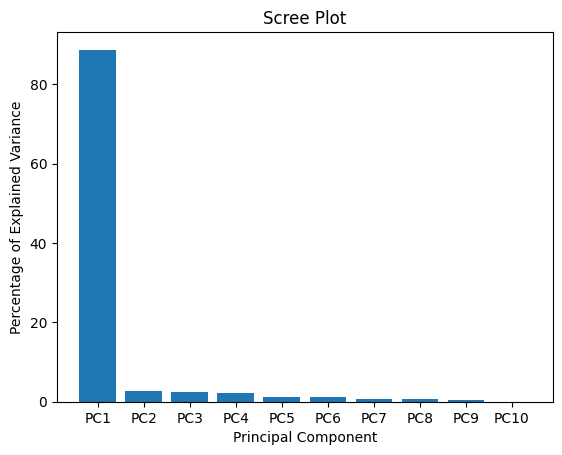

In [15]:
# Draw a scree plot and a PCA plot

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) # calculate the percentage of variatiom that each principal component accounts for
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # labels for the plot, pc1, pc2...

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#### Almost all of the variation is along the PC1, so a 2D graph, using PC1 and PC2, should do a good job repreaenting the original data.

In [17]:
# plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels) # scaled data into a new df
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.112097,-1.754762,-2.194088,1.488786,-0.483339,-0.036728,-0.054285,1.275307,0.668223,4.481430e-16
wt2,9.581832,-2.104740,-1.250418,-1.991445,0.778404,-0.845243,-0.110378,-0.698465,-0.914750,1.321110e-15
wt3,9.691558,1.363524,2.683776,0.330911,-1.039953,-1.514697,-0.178308,0.603192,-0.478004,2.516980e-16
wt4,9.132561,1.509758,0.212920,-2.190503,-0.517025,1.519401,1.146697,-0.077100,0.631497,3.317041e-16
wt5,9.563022,1.046740,0.416823,2.340933,1.226219,0.924948,-0.798230,-1.073493,0.109275,1.298757e-15


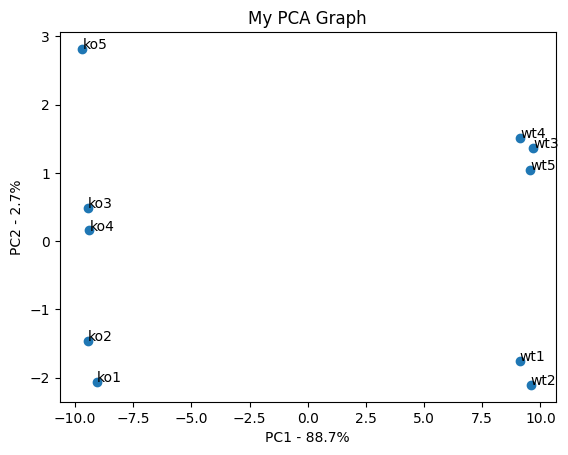

In [18]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

The wt samples clustered on the right side suggest that they are correlated with each other. The Ko samples clustered on the left side suggest that they are correlated with each other. And the separation of the two clusters along the x-axis suggests that wt samples are very different from ko samples.

In [19]:
# Determine which genes had the biggest influence on PC1

## get the name of the top 10 measurements (genes) that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)

## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene36     0.106130
gene17    -0.106129
gene25    -0.106111
gene23    -0.106089
gene89     0.106082
gene37    -0.106043
gene68     0.106042
gene81    -0.106034
gene100   -0.106028
gene95    -0.106020
dtype: float64
